In [1]:
%matplotlib notebook

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import celerite
from celerite import terms
import emcee
import corner
from scipy import signal
from IPython.display import display, Math, Image
import pandas as pd
import os

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [3]:
dir = os.getcwd()
dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2\\src'

In [4]:
par_dir = os.path.dirname(dir)
par_dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2'

In [5]:
rv_data = pd.read_csv(par_dir + "/data/Posteriors_RV.csv").ffill().set_index(['Photometry','Sector','RV group'])
columns = {"Inc - S0" : "Inc - Log S0","Inc + S0" : "Inc + Log S0","Inc - Q" : "Inc - Log Q","Inc + Q" : "Inc + Log Q","Inc - w0":"Inc - Log w0","Inc + w0" : "Inc + Log w0"}
rv_data = rv_data.rename(columns=columns)

sectors_names = {"TESS_18_19" : ["All","Sector1","Sector2","Sector3"],
                "TESS_20_0" : ["All","Sector1","Sector2"],
                "TESS_20_1" : ["All","Sector1","Sector2"],
                "TESS_21" : ["All","Sector1","Sector2"]}

rv_times = rv_data.loc[("TESS_18_19","All")].index.values

hps = ["Log S0","Log Q","Log w0","Offset"]

In [6]:
x = [i for i in range(13)]
myxticks = np.array([])
for photometry in sectors_names.keys() :
            for name in sectors_names[photometry] :
                myxticks = np.append(myxticks,photometry + "_" + name)

for hp in hps :
    for t in rv_times :
        stock = np.array([])
        plt.figure()
        for photometry in sectors_names.keys() :
            for name in sectors_names[photometry] :
                stock = np.append(stock,rv_data.loc[(photometry,name,t),(hp,"Inc - " + hp,"Inc + " + hp)].values)
        stock = np.reshape(stock,(13,3))
        plt.grid()
        plt.xticks(x,myxticks,rotation=90)
        plt.errorbar(x,stock[:,0],yerr=stock[:,1:3].T,markersize=5,capsize=3,fmt='o')
        plt.ylabel(hp)
        plt.title("%s_%s"%(hp,t))
        plt.savefig(par_dir + "/plots/Comparison/RV_HP/%s_%s.png"%(hp,t),bbox_inches='tight')
        plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

vandal :  (28, 2) 
lag2019m2 :  (28, 2) 
lag2019m5 :  (31,) 
lag2020 :  (33, 2) 
GP :  (33, 3)


<IPython.core.display.Javascript object>


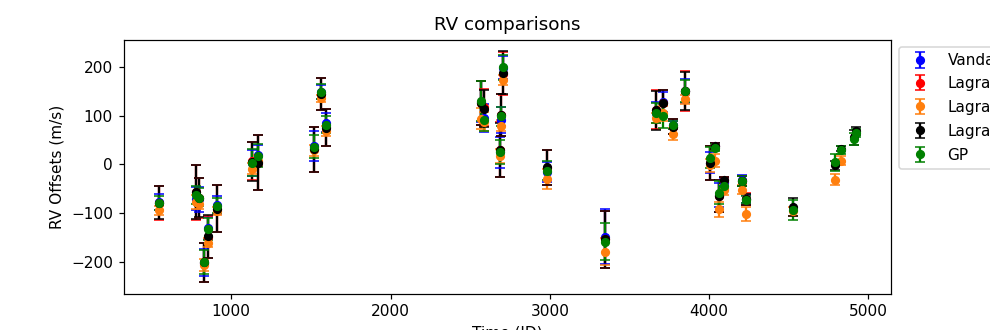

<IPython.core.display.Javascript object>


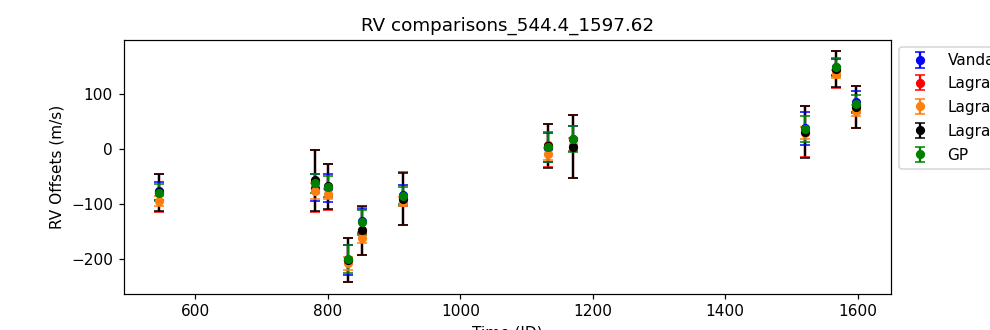

<IPython.core.display.Javascript object>


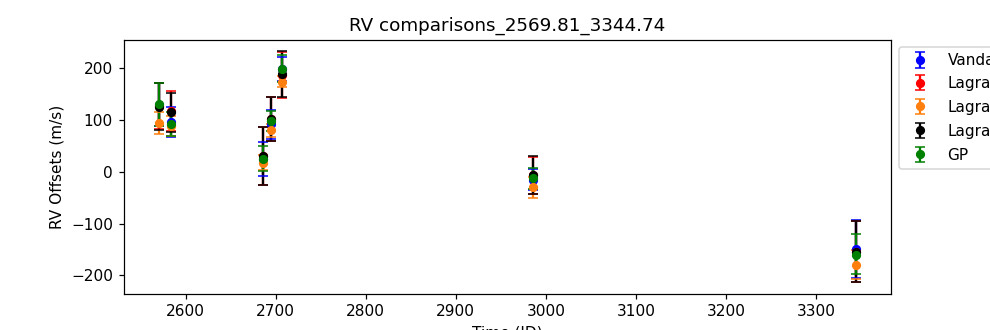

<IPython.core.display.Javascript object>


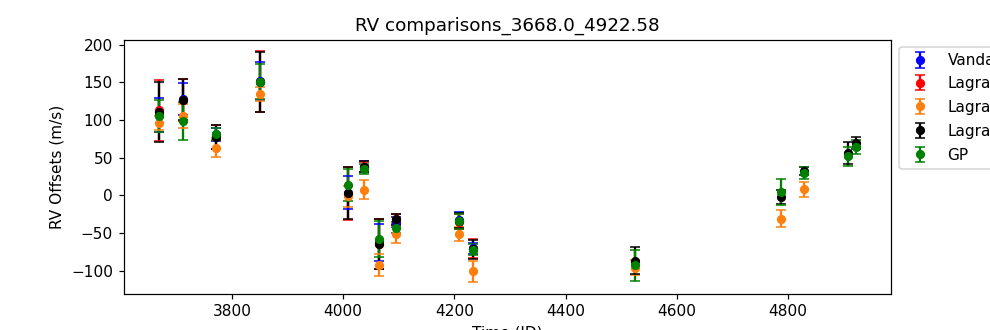

In [8]:
rv_times = rv_data.loc[("TESS_18_19","All")].index.values
rv_GP = rv_data.loc[("TESS_20_0","All"),("Offset","Inc - Offset","Inc + Offset")].values
rv_vandal = np.loadtxt(par_dir + "/data/rv_vandal_data.txt",usecols=(1,2),skiprows=8)
rv_lagrange_2019_m2 = np.loadtxt(par_dir + "/data/rv_lagrange_2019_m2_data.txt",usecols=(1,2))
rv_lagrange_2019_m5 = np.loadtxt(par_dir + "/data/rv_lagrange_2019_m5_data.txt",usecols=(1,2))
rv_lagrange_2020 = np.loadtxt(par_dir + "/data/rv_lagrange_2020_data.txt",usecols=(1,2))
index_delete = [5,17,19,21]
rv_lagrange_2019_m5_offsets = np.delete(rv_lagrange_2019_m5[:,0],index_delete) *1000
rv_lagrange_2019_m5_offsets_errors = np.delete(rv_lagrange_2019_m5[:,1],index_delete) *1000
print("vandal : ",rv_vandal.shape,"\nlag2019m2 : ",rv_lagrange_2019_m2.shape,"\nlag2019m5 : ",rv_lagrange_2019_m5_offsets.shape,"\nlag2020 : ",rv_lagrange_2020.shape,"\nGP : ",rv_GP.shape)

plt.figure(figsize=(9,3))
plt.errorbar(rv_times[0:28], rv_vandal[:,0], yerr = rv_vandal[:,1], fmt = 'ob', markersize = 5, capsize = 3, label = "Vandal")
plt.errorbar(rv_times[0:28], rv_lagrange_2019_m2[:,0], yerr = rv_lagrange_2019_m2[:,1], fmt = 'or', markersize = 5, capsize = 3, label = "Lagrange_2019_M2")
plt.errorbar(rv_times[0:31], rv_lagrange_2019_m5_offsets, yerr = rv_lagrange_2019_m5_offsets_errors, fmt = 'o', color = "tab:orange", markersize = 5, capsize = 3, label = "Lagrange_2019_M5")
plt.errorbar(rv_times, rv_lagrange_2020[:,0], yerr = rv_lagrange_2020[:,1], fmt = 'ok', markersize = 5, capsize = 3, label = "Lagrange_2020")
plt.errorbar(rv_times, rv_GP[:,0], yerr = rv_GP[:,1:3].T, fmt = 'og', markersize = 5, capsize = 3, label = "GP")
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.xlabel("Time (JD)")
plt.ylabel("RV Offsets (m/s)")
plt.title("RV comparisons")
plt.savefig(par_dir + "/plots/Comparison/RV_comparisons/RV_comparisons.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=(9,3))
time_index = [i for i in range(0,11)]
plt.errorbar(rv_times[time_index], rv_vandal[time_index,0], yerr = rv_vandal[time_index,1], fmt = 'ob', markersize = 5, capsize = 3, label = "Vandal")
plt.errorbar(rv_times[time_index], rv_lagrange_2019_m2[time_index,0], yerr = rv_lagrange_2019_m2[time_index,1], fmt = 'or', markersize = 5, capsize = 3, label = "Lagrange_2019_M2")
plt.errorbar(rv_times[time_index], rv_lagrange_2019_m5_offsets[time_index], yerr = rv_lagrange_2019_m5_offsets_errors[time_index], fmt = 'o', color = "tab:orange", markersize = 5, capsize = 3, label = "Lagrange_2019_M5")
plt.errorbar(rv_times[time_index], rv_lagrange_2020[time_index,0], yerr = rv_lagrange_2020[time_index,1], fmt = 'ok', markersize = 5, capsize = 3, label = "Lagrange_2020")
plt.errorbar(rv_times[time_index], rv_GP[time_index,0], yerr = rv_GP[time_index,1:3].T, fmt = 'og', markersize = 5, capsize = 3, label = "GP")
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.xlabel("Time (JD)")
plt.ylabel("RV Offsets (m/s)")
plt.title("RV comparisons_%s_%s"%(rv_times[time_index[0]],rv_times[time_index[-1]]))
plt.savefig(par_dir + "/plots/Comparison/RV_comparisons/RV_comparisons_%s_%s.pdf"%(rv_times[time_index[0]],rv_times[time_index[-1]]),bbox_inches='tight')
plt.show()

plt.figure(figsize=(9,3))
time_index = [i for i in range(11,18)]
plt.errorbar(rv_times[time_index], rv_vandal[time_index,0], yerr = rv_vandal[time_index,1], fmt = 'ob', markersize = 5, capsize = 3, label = "Vandal")
plt.errorbar(rv_times[time_index], rv_lagrange_2019_m2[time_index,0], yerr = rv_lagrange_2019_m2[time_index,1], fmt = 'or', markersize = 5, capsize = 3, label = "Lagrange_2019_M2")
plt.errorbar(rv_times[time_index], rv_lagrange_2019_m5_offsets[time_index], yerr = rv_lagrange_2019_m5_offsets_errors[time_index], fmt = 'o', color = "tab:orange", markersize = 5, capsize = 3, label = "Lagrange_2019_M5")
plt.errorbar(rv_times[time_index], rv_lagrange_2020[time_index,0], yerr = rv_lagrange_2020[time_index,1], fmt = 'ok', markersize = 5, capsize = 3, label = "Lagrange_2020")
plt.errorbar(rv_times[time_index], rv_GP[time_index,0], yerr = rv_GP[time_index,1:3].T, fmt = 'og', markersize = 5, capsize = 3, label = "GP")
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.xlabel("Time (JD)")
plt.ylabel("RV Offsets (m/s)")
plt.title("RV comparisons_%s_%s"%(rv_times[time_index[0]],rv_times[time_index[-1]]))
plt.savefig(par_dir + "/plots/Comparison/RV_comparisons/RV_comparisons_%s_%s.pdf"%(rv_times[time_index[0]],rv_times[time_index[-1]]),bbox_inches='tight')
plt.show()

plt.figure(figsize=(9,3))
time_index = [i for i in range(18,28)]
time_index1 = [i for i in range(18,31)]
time_index2 = [i for i in range(18,33)]
plt.errorbar(rv_times[time_index], rv_vandal[time_index,0], yerr = rv_vandal[time_index,1], fmt = 'ob', markersize = 5, capsize = 3, label = "Vandal")
plt.errorbar(rv_times[time_index], rv_lagrange_2019_m2[time_index,0], yerr = rv_lagrange_2019_m2[time_index,1], fmt = 'or', markersize = 5, capsize = 3, label = "Lagrange_2019_M2")
plt.errorbar(rv_times[time_index1], rv_lagrange_2019_m5_offsets[time_index1], yerr = rv_lagrange_2019_m5_offsets_errors[time_index1], fmt = 'o', color = "tab:orange", markersize = 5, capsize = 3, label = "Lagrange_2019_M5")
plt.errorbar(rv_times[time_index2], rv_lagrange_2020[time_index2,0], yerr = rv_lagrange_2020[time_index2,1], fmt = 'ok', markersize = 5, capsize = 3, label = "Lagrange_2020")
plt.errorbar(rv_times[time_index2], rv_GP[time_index2,0], yerr = rv_GP[time_index2,1:3].T, fmt = 'og', markersize = 5, capsize = 3, label = "GP")
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.xlabel("Time (JD)")
plt.ylabel("RV Offsets (m/s)")
plt.title("RV comparisons_%s_%s"%(rv_times[time_index2[0]],rv_times[time_index2[-1]]))
plt.savefig(par_dir + "/plots/Comparison/RV_comparisons/RV_comparisons_%s_%s.pdf"%(rv_times[time_index2[0]],rv_times[time_index2[-1]]),bbox_inches='tight')
plt.show()

In [40]:
rv_data_test = pd.read_csv(par_dir + "/data/Posteriors_RV_test.csv").ffill().set_index(['Photometry','Sector','RV group'])
columns = {"Inc - S0" : "Inc - Log S0","Inc + S0" : "Inc + Log S0","Inc - Q" : "Inc - Log Q","Inc + Q" : "Inc + Log Q","Inc - w0":"Inc - Log w0","Inc + w0" : "Inc + Log w0"}
rv_data_test = rv_data_test.rename(columns=columns)

sectors_names = {"TESS_18_19" : ["All","Sector1","Sector2","Sector3"],
                "TESS_20_0" : ["All","Sector1","Sector2"],
                "TESS_20_1" : ["All","Sector1","Sector2"],
                "TESS_21" : ["All","Sector1","Sector2"]}

rv_times = rv_data_test.loc[("TESS_18_19","All")].index.values
rv_times_2680_2710 = rv_times[0:4]
rv_times_4226_4245 = rv_times[4:]
print(rv_times)
hps = ["Log S0","Log Q","Log w0","Offset"]
rv_times_4226_4245

['2680-2710' '2685.70' '2694.56' '2707.08' '4226' '4233.60' '4245']


array(['4226', '4233.60', '4245'], dtype=object)

In [41]:
x1 = [0,1,2,3]
x2 = [0,1,2]

In [45]:
for hp in hps :
    for photometry in sectors_names.keys() :
        
        
        for name in sectors_names[photometry] :
            stock1 = np.array([])
            stock2 = np.array([])
            for t1 in rv_times_2680_2710 :
                stock1 = np.append(stock1,rv_data_test.loc[(photometry,name,t1),(hp,"Inc - " + hp,"Inc + " + hp)].values)
            for t2 in rv_times_4226_4245 :
                stock2 = np.append(stock2,rv_data_test.loc[(photometry,name,t2),(hp,"Inc - " + hp,"Inc + " + hp)].values)
            plt.figure()
            stock1 = np.reshape(stock1,(4,3))
            stock2 = np.reshape(stock2,(3,3))
            plt.grid()
            plt.xticks(x1,rv_times_2680_2710,rotation=90)
            plt.errorbar(x1,stock1[:,0],yerr=stock1[:,1:3].T,markersize=5,capsize=3,fmt='o')
            plt.ylabel(hp)
            plt.title("%s_%s_%s_%s"%(hp,photometry,name,rv_times_2680_2710[0]))
            plt.savefig(par_dir + "/plots/Comparison/RV_HP/%s_%s_%s_%s_test.png"%(hp,photometry,name,rv_times_2680_2710[0]),bbox_inches='tight')
            plt.close()
            
            plt.figure()
            plt.grid()
            plt.xticks(x2,rv_times_4226_4245,rotation=90)
            plt.errorbar(x2,stock2[:,0],yerr=stock2[:,1:3].T,markersize=5,capsize=3,fmt='o')
            plt.ylabel(hp)
            plt.title("%s_%s_%s_%s"%(hp,photometry,name,rv_times_4226_4245[1]))
            plt.savefig(par_dir + "/plots/Comparison/RV_HP/%s_%s_%s_%s_test.png"%(hp,photometry,name,rv_times_4226_4245[1]),bbox_inches='tight')
            plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>